In [12]:
import joblib
import pandas as pd
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical

from evaluation import evaluate_and_append_accuracy, plot_metrics, plot_history, plot_confusion_matrices
from model import create_and_train_model, create_seq_model, create_deep_model, create_deep_model2
from preprocessing import load_and_preprocess_data
from utils import ensure_dir

In [3]:
# Load and preprocess the data
X, y, le = load_and_preprocess_data()

# Get the class labels
class_labels = le.classes_

# Initialize the cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
metrics = []

# Directory to store the model data
model_dir = 'model_data'

# Initialize model and model_name to None
model = None
model_name = None

In [8]:
# Cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert labels to categorical one-hot encoding
    y_train_categorical = to_categorical(y_train, num_classes=len(le.classes_))
    y_test_categorical = to_categorical(y_test, num_classes=len(le.classes_))

    # Create and train the model
    model, model_name = create_and_train_model(X_train, y_train_categorical, create_deep_model2, len(le.classes_), fold)

    # Evaluate the model and append the accuracy to the list
    evaluate_and_append_accuracy(model, model_name, X_test, y_test_categorical, metrics, fold)

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9086 - loss: 31.3362
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.9380 - loss: 7.6575
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.9340 - loss: 5.1076
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.9385 - loss: 4.0069
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9465 - loss: 2.9289
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.9467 - loss: 2.6473
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.9405 - loss: 2.2540
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.9455 - loss: 2.0501
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.9393 - loss: 1.9587
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.9439 - loss: 1.4227
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.9506 - loss: 1.2725
Epoch 12/50
800/800 ━━━━━━━━━

In [5]:
# model_name = 'Sequential'

In [13]:
# Load the histories from csv
histories = [pd.read_csv(
    f'results/{model_name}/csv/history_fold_{fold}.csv') for fold in range(1, kf.get_n_splits() + 1)]
folds = list(range(1, kf.get_n_splits() + 1))

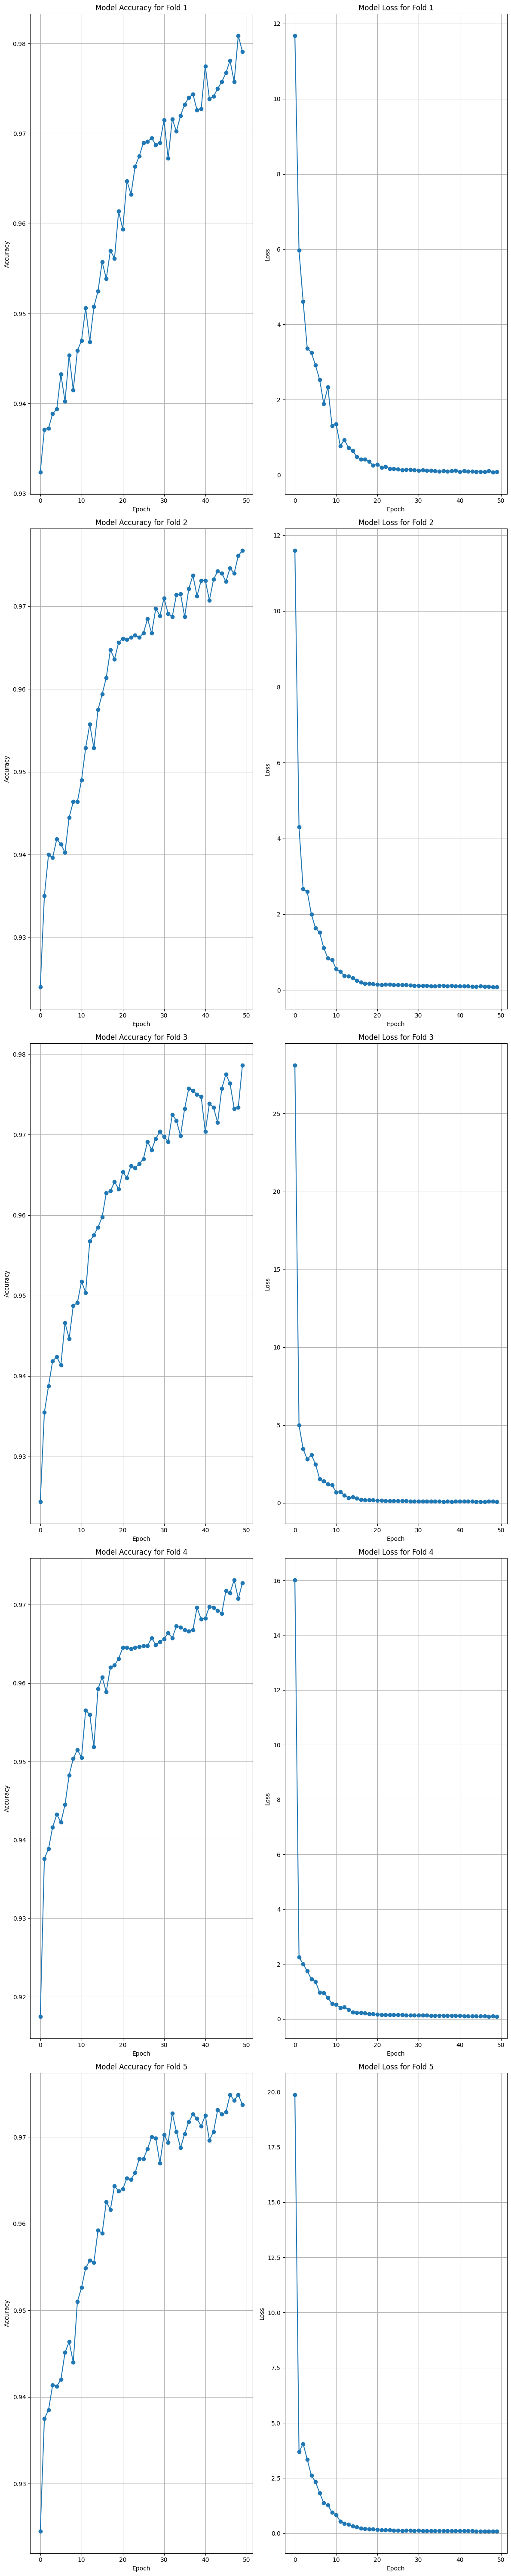

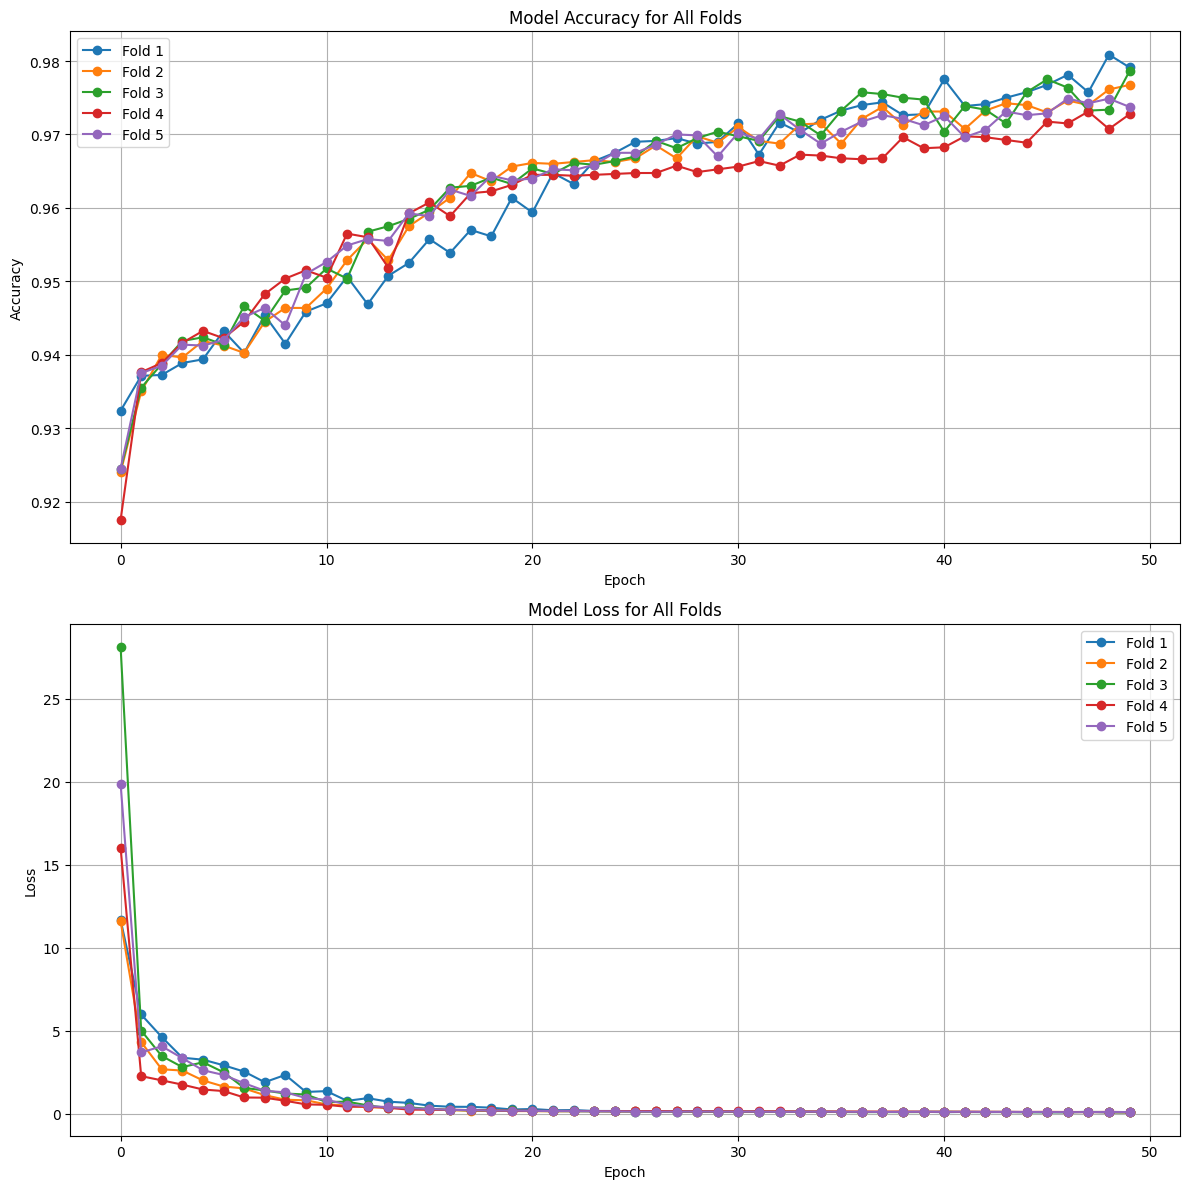

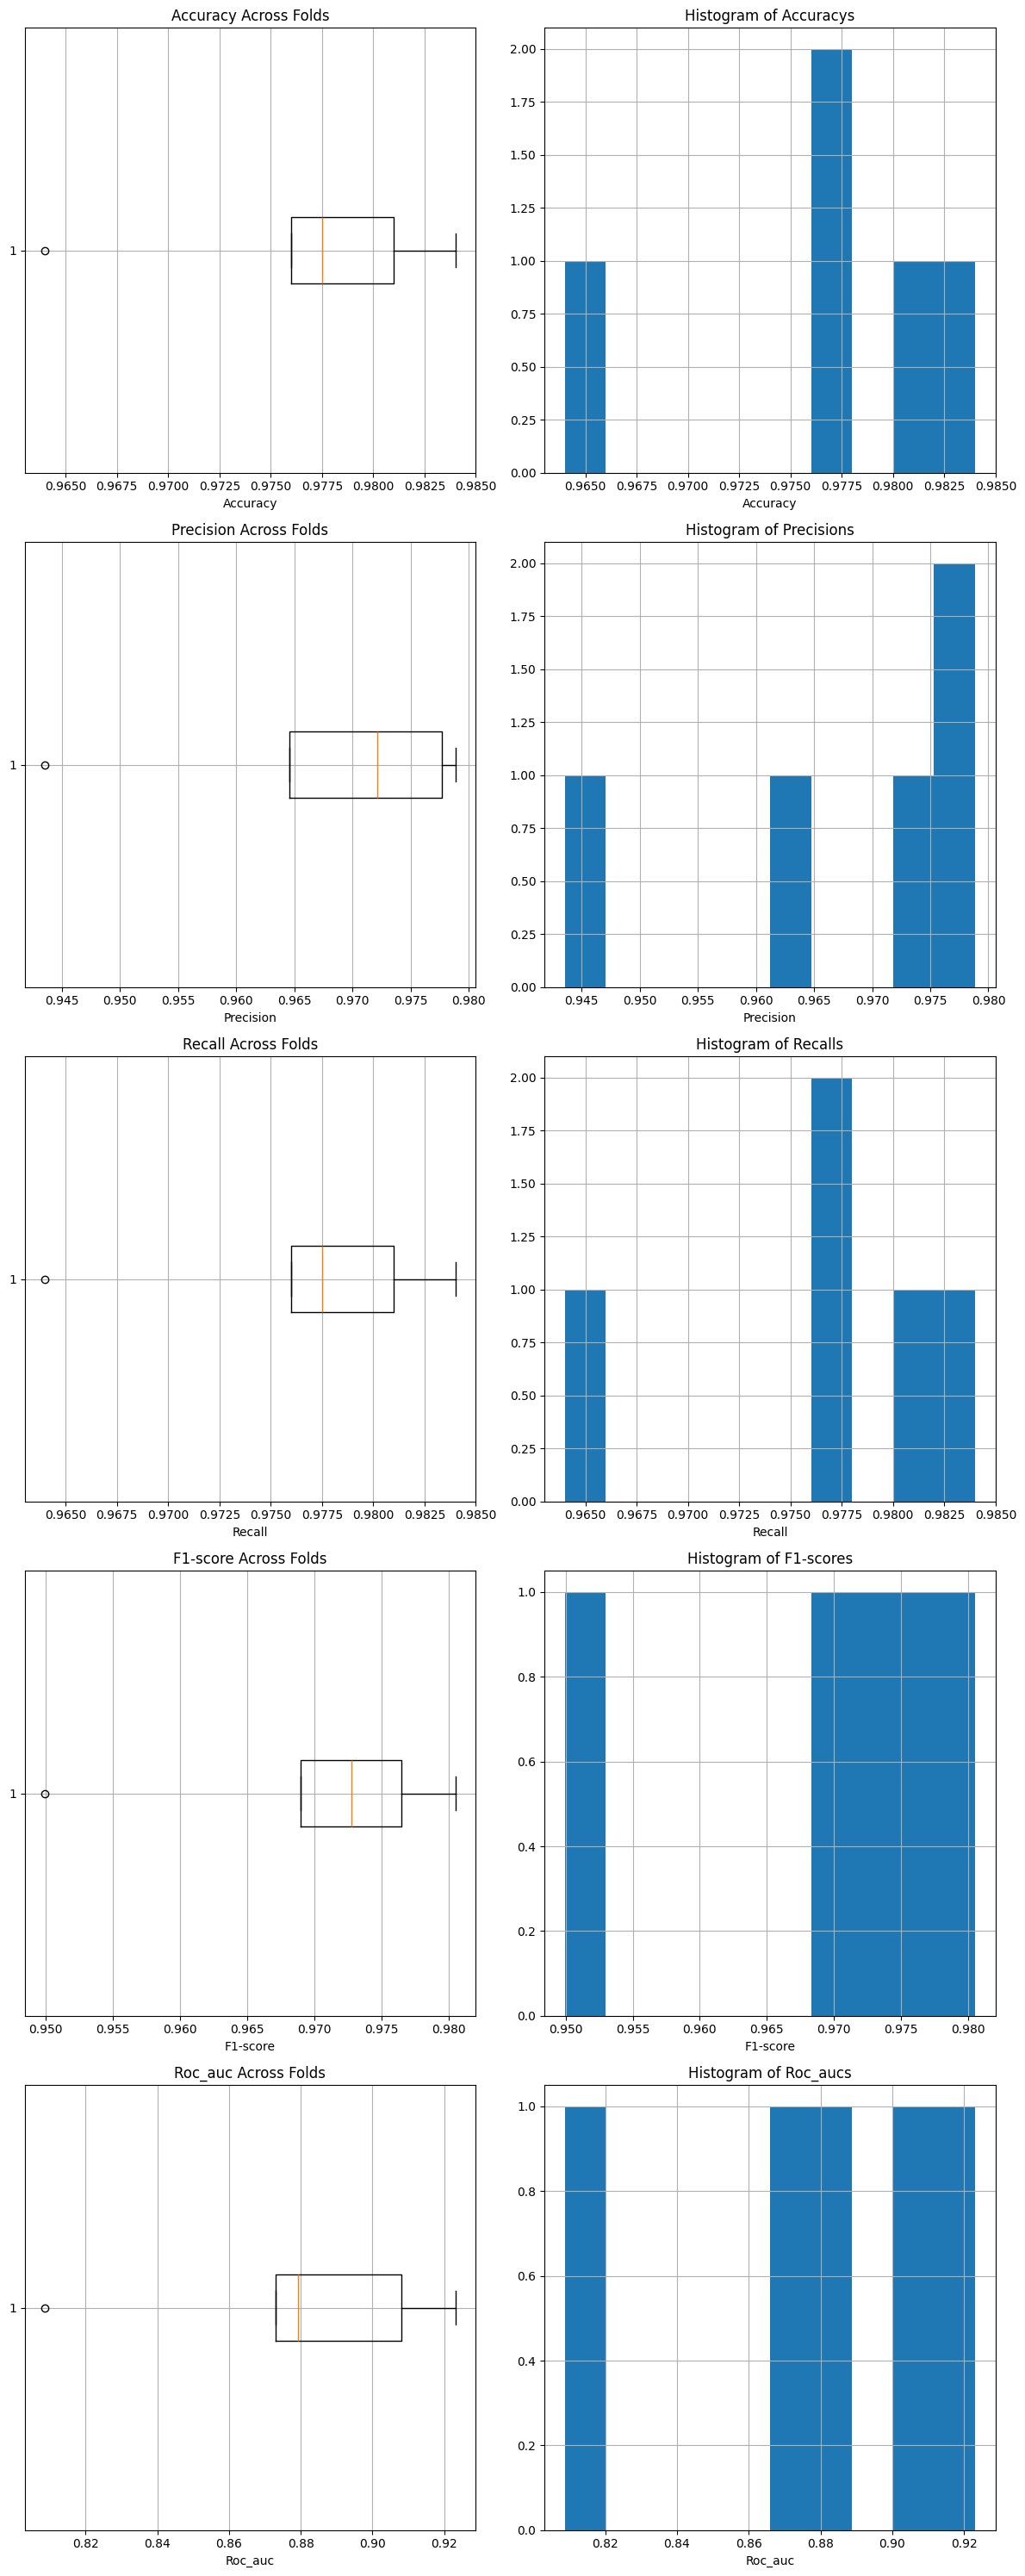

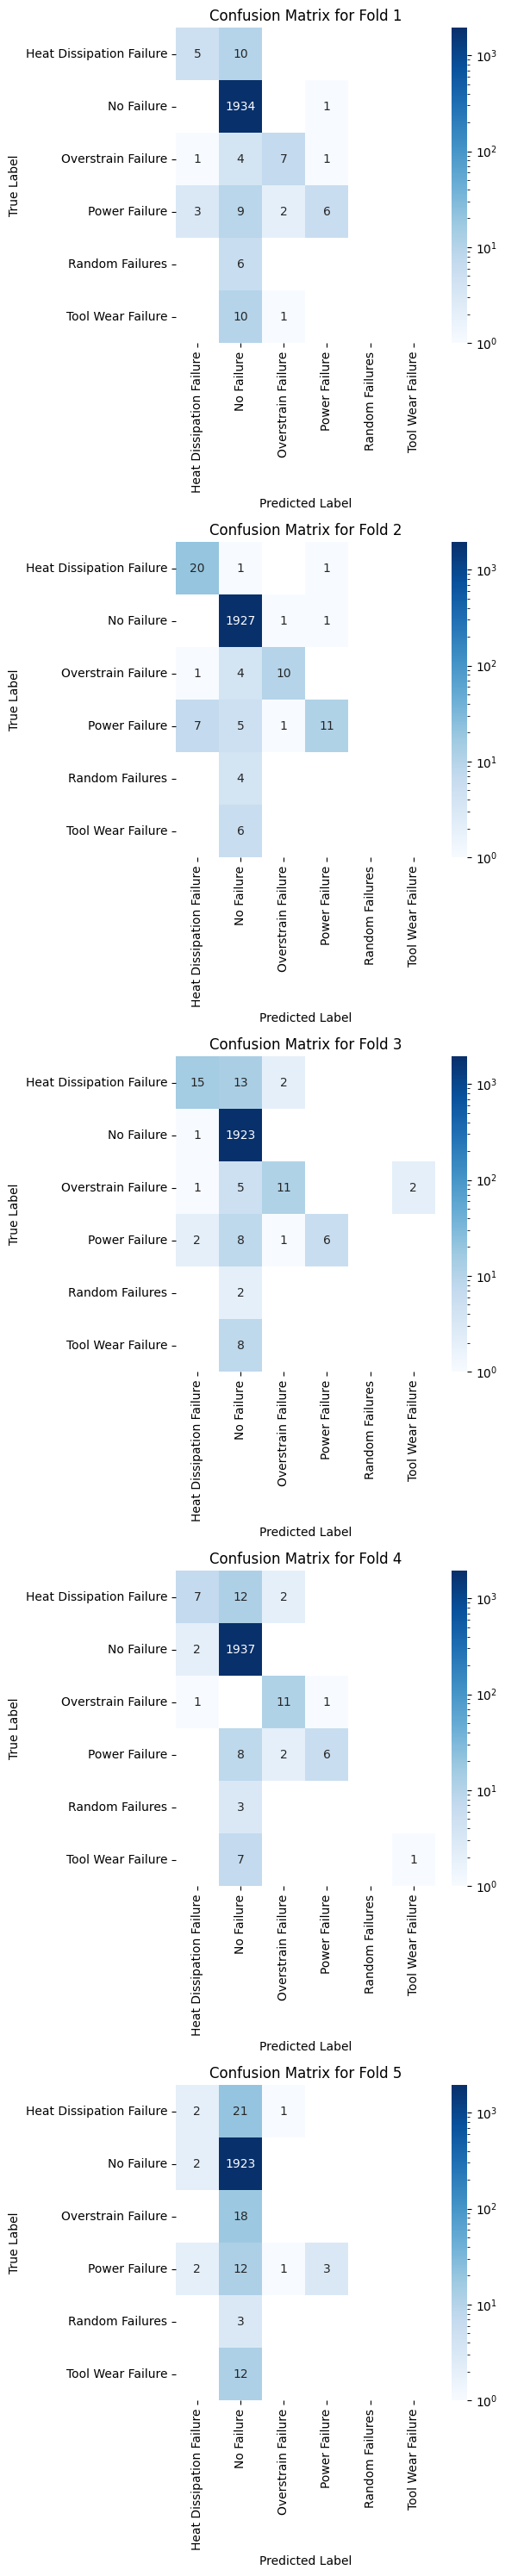

In [14]:
# Plot the histories
plot_history(histories, folds, model_name)

# Plot the metrics
plot_metrics(metrics, model_name)

# Extract confusion matrices from accuracies
confusion_matrices = [metrics['confusion_matrix'] for metrics in metrics]

# Plot the confusion matrices
plot_confusion_matrices(confusion_matrices, model_name, class_labels)

In [1]:
from evaluation import plot_model_metrics

plot_model_metrics()

In [ ]:
# Save the model
model_path = model_dir + '/' + model_name + '/model.keras'
ensure_dir(model_path)
model.save(model_path)

# Save the label encoder
le_path = model_dir + '/' + model_name + '/label_encoder.joblib'
ensure_dir(le_path)
joblib.dump(le, le_path)